In [1]:
import pandas as pd

# Abnormal return dataset
returns = pd.read_csv("event_study_abnormal_returns_panel_20_20.csv")

# EPS surprise dataset
eps_data = pd.read_csv("av_eps_quarterly.csv")

In [2]:
returns

,event_id,ticker,date,event_day,abnormal_return
0,AAPL_2006-03-31,AAPL,2006-03-13,-18,0.034758
1,AAPL_2006-03-31,AAPL,2006-03-14,-17,0.000241
2,AAPL_2006-03-31,AAPL,2006-03-15,-16,-0.024750
3,AAPL_2006-03-31,AAPL,2006-03-16,-15,-0.023199
4,AAPL_2006-03-31,AAPL,2006-03-17,-14,-0.001936
...,...,...,...,...,...
4803,NVDA_2025-10-31,NVDA,2025-11-14,14,0.014261
4804,NVDA_2025-10-31,NVDA,2025-11-17,17,-0.007808
4805,NVDA_2025-10-31,NVDA,2025-11-18,18,-0.011612
4806,NVDA_2025-10-31,NVDA,2025-11-19,19,0.018278


In [3]:
eps_data

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,symbol
0,2025/09/30,2025/10/30,1.850,1.760,0.090,5.1136,post-market,AAPL
1,2025/06/30,2025/07/31,1.570,1.430,0.140,9.7902,post-market,AAPL
2,2025/03/31,2025/05/01,1.650,1.620,0.030,1.8519,post-market,AAPL
3,2024/12/31,2025/01/30,2.400,2.340,0.060,2.5641,post-market,AAPL
4,2024/09/30,2024/10/31,0.970,0.950,0.020,2.1053,post-market,AAPL
...,...,...,...,...,...,...,...,...
306,2000/04/30,2000/05/16,0.001,0.001,0.000,0.0000,pre-market,NVDA
307,2000/01/31,2000/02/15,0.001,0.001,0.000,0.0000,pre-market,NVDA
308,1999/10/31,1999/11/18,0.001,0.002,-0.001,-50.0000,pre-market,NVDA
309,1999/07/31,1999/08/18,0.002,0.002,0.000,0.0000,pre-market,NVDA


In [4]:
# Split event_id into ticker and quarter_end
returns[["ticker_from_id", "quarter_end"]] = returns["event_id"].str.split("_", expand=True)

# Convert quarter_end to datetime
returns["quarter_end"] = pd.to_datetime(returns["quarter_end"])

In [5]:
# Rename symbol to ticker for consistency
eps_data = eps_data.rename(columns={"symbol": "ticker"})

# Convert fiscalDateEnding to datetime
eps_data["fiscalDateEnding"] = pd.to_datetime(eps_data["fiscalDateEnding"])

In [6]:
merged = returns.merge(
    eps_data,
    left_on=["ticker_from_id", "quarter_end"],
    right_on=["ticker", "fiscalDateEnding"],
    how="inner"
)

print("Merged dataset sample:")
print(merged.head())

Merged dataset sample:
          event_id ticker_x        date  event_day  abnormal_return  \
0  AAPL_2006-03-31     AAPL  2006-03-13        -18         0.034758   
1  AAPL_2006-03-31     AAPL  2006-03-14        -17         0.000241   
2  AAPL_2006-03-31     AAPL  2006-03-15        -16        -0.024750   
3  AAPL_2006-03-31     AAPL  2006-03-16        -15        -0.023199   
4  AAPL_2006-03-31     AAPL  2006-03-17        -14        -0.001936   

  ticker_from_id quarter_end fiscalDateEnding reportedDate  reportedEPS  \
0           AAPL  2006-03-31       2006-03-31   2006/04/19         0.02   
1           AAPL  2006-03-31       2006-03-31   2006/04/19         0.02   
2           AAPL  2006-03-31       2006-03-31   2006/04/19         0.02   
3           AAPL  2006-03-31       2006-03-31   2006/04/19         0.02   
4           AAPL  2006-03-31       2006-03-31   2006/04/19         0.02   

   estimatedEPS  surprise  surprisePercentage   reportTime ticker_y  
0          0.02       0.0    

In [7]:
merged

,event_id,ticker_x,date,event_day,abnormal_return,ticker_from_id,quarter_end,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,ticker_y
0,AAPL_2006-03-31,AAPL,2006-03-13,-18,0.034758,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL
1,AAPL_2006-03-31,AAPL,2006-03-14,-17,0.000241,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL
2,AAPL_2006-03-31,AAPL,2006-03-15,-16,-0.024750,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL
3,AAPL_2006-03-31,AAPL,2006-03-16,-15,-0.023199,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL
4,AAPL_2006-03-31,AAPL,2006-03-17,-14,-0.001936,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,NVDA_2025-10-31,NVDA,2025-11-14,14,0.014261,NVDA,2025-10-31,2025-10-31,2025/11/19,1.30,1.24,0.06,4.8387,post-market,NVDA
4790,NVDA_2025-10-31,NVDA,2025-11-17,17,-0.007808,NVDA,2025-10-31,2025-10-31,2025/11/19,1.30,1.24,0.06,4.8387,post-market,NVDA
4791,NVDA_2025-10-31,NVDA,2025-11-18,18,-0.011612,NVDA,2025-10-31,2025-10-31,2025/11/19,1.30,1.24,0.06,4.8387,post-market,NVDA
4792,NVDA_2025-10-31,NVDA,2025-11-19,19,0.018278,NVDA,2025-10-31,2025-10-31,2025/11/19,1.30,1.24,0.06,4.8387,post-market,NVDA


In [8]:
#Step 4: Categorization + Frequency by Stock
# A. Categorize EPS Events
def categorize_surprise(row):
    if row["surprisePercentage"] < -5:
        return "Negative Surprise"
    elif -5 <= row["surprisePercentage"] <= 5:
        return "Neutral/Small Surprise"
    else:
        return "Positive Surprise"

merged["EPS_Category"] = merged.apply(categorize_surprise, axis=1)
merged

,event_id,ticker_x,date,event_day,abnormal_return,ticker_from_id,quarter_end,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,ticker_y,EPS_Category
0,AAPL_2006-03-31,AAPL,2006-03-13,-18,0.034758,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL,Neutral/Small Surprise
1,AAPL_2006-03-31,AAPL,2006-03-14,-17,0.000241,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL,Neutral/Small Surprise
2,AAPL_2006-03-31,AAPL,2006-03-15,-16,-0.024750,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL,Neutral/Small Surprise
3,AAPL_2006-03-31,AAPL,2006-03-16,-15,-0.023199,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL,Neutral/Small Surprise
4,AAPL_2006-03-31,AAPL,2006-03-17,-14,-0.001936,AAPL,2006-03-31,2006-03-31,2006/04/19,0.02,0.02,0.00,0.0000,post-market,AAPL,Neutral/Small Surprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,NVDA_2025-10-31,NVDA,2025-11-14,14,0.014261,NVDA,2025-10-31,2025-10-31,2025/11/19,1.30,1.24,0.06,4.8387,post-market,NVDA,Neutral/Small Surprise
4790,NVDA_2025-10-31,NVDA,2025-11-17,17,-0.007808,NVDA,2025-10-31,2025-10-31,2025/11/19,1.30,1.24,0.06,4.8387,post-market,NVDA,Neutral/Small Surprise
4791,NVDA_2025-10-31,NVDA,2025-11-18,18,-0.011612,NVDA,2025-10-31,2025-10-31,2025/11/19,1.30,1.24,0.06,4.8387,post-market,NVDA,Neutral/Small Surprise
4792,NVDA_2025-10-31,NVDA,2025-11-19,19,0.018278,NVDA,2025-10-31,2025-10-31,2025/11/19,1.30,1.24,0.06,4.8387,post-market,NVDA,Neutral/Small Surprise


In [42]:
# Save DataFrame to CSV
merged.to_excel("merged.xlsx", index=False)

In [9]:
#B. Overall Frequency of EPS Categories
freq_by_cat = merged.groupby(["ticker_from_id", "EPS_Category"])["reportedDate"].nunique().reset_index()
freq_by_cat.columns = ["Stock", "EPS_Category", "Announcement_Count"]

print("Announcements by stock and EPS category:")
print(freq_by_cat.head())

Announcements by stock and EPS category:
   Stock            EPS_Category  Announcement_Count
0   AAPL  Neutral/Small Surprise                  23
1   AAPL       Positive Surprise                  32
2  GOOGL       Negative Surprise                   3
3  GOOGL  Neutral/Small Surprise                  26
4  GOOGL       Positive Surprise                  27


In [10]:
#C. Normalized Frequency (Percentages per Stock)
import matplotlib.pyplot as plt

# Pivot to wide format
pivot_freq = freq_by_cat.pivot(index="Stock", columns="EPS_Category", values="Announcement_Count").fillna(0)

# Add row totals
pivot_freq["Total"] = pivot_freq.sum(axis=1)

# Normalize to percentages
pivot_freq_pct = pivot_freq.div(pivot_freq["Total"], axis=0) * 100
pivot_freq_pct = pivot_freq_pct.drop(columns="Total")

print("Percentage distribution of EPS categories per stock:")
print(pivot_freq_pct.head())

Percentage distribution of EPS categories per stock:
EPS_Category  Negative Surprise  Neutral/Small Surprise  Positive Surprise
Stock                                                                     
AAPL                   0.000000               41.818182          58.181818
GOOGL                  5.357143               46.428571          48.214286
NVDA                   5.000000               16.666667          78.333333


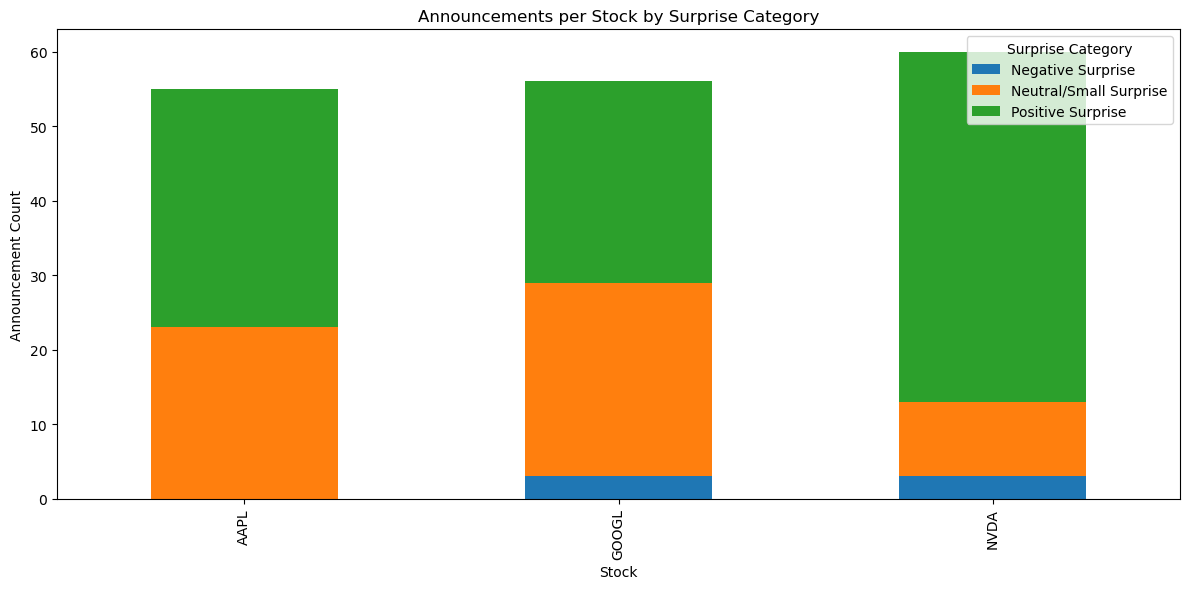

In [11]:
pivot_freq = freq_by_cat.pivot(index="Stock", columns="EPS_Category", values="Announcement_Count").fillna(0)

pivot_freq.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Announcements per Stock by Surprise Category")
plt.xlabel("Stock")
plt.ylabel("Announcement Count")
plt.xticks(rotation=90)
plt.legend(title="Surprise Category")
plt.tight_layout()
plt.show()

In [12]:
# Compute CAR per event (ticker + announcement date)
merged["CAR"] = merged.groupby(["ticker_from_id", "reportedDate"])["abnormal_return"].cumsum()

print("CAR sample:")
print(merged[["ticker_from_id", "reportedDate", "event_day", "abnormal_return", "CAR"]].head())

CAR sample:
  ticker_from_id reportedDate  event_day  abnormal_return       CAR
0           AAPL   2006/04/19        -18         0.034758  0.034758
1           AAPL   2006/04/19        -17         0.000241  0.034999
2           AAPL   2006/04/19        -16        -0.024750  0.010249
3           AAPL   2006/04/19        -15        -0.023199 -0.012950
4           AAPL   2006/04/19        -14        -0.001936 -0.014886


In [39]:
# Compute CAR per event (ticker + announcement date)
merged["CAR"] = merged.groupby(["ticker_from_id", "reportedDate"])["abnormal_return"].cumsum()

In [15]:
# Keep only event_day >= 0 (announcement day and after)
post_announcement = merged[merged["event_day"] >= 0]

In [16]:
avg_car_post = post_announcement.groupby(["EPS_Category", "event_day"])["CAR"].mean().reset_index()

print("Average CAR per EPS category (post-announcement):")
print(avg_car_post.head())

Average CAR per EPS category (post-announcement):
        EPS_Category  event_day       CAR
0  Negative Surprise          0  0.008596
1  Negative Surprise          1  0.028852
2  Negative Surprise          2  0.068147
3  Negative Surprise          3  0.043871
4  Negative Surprise          4  0.034610


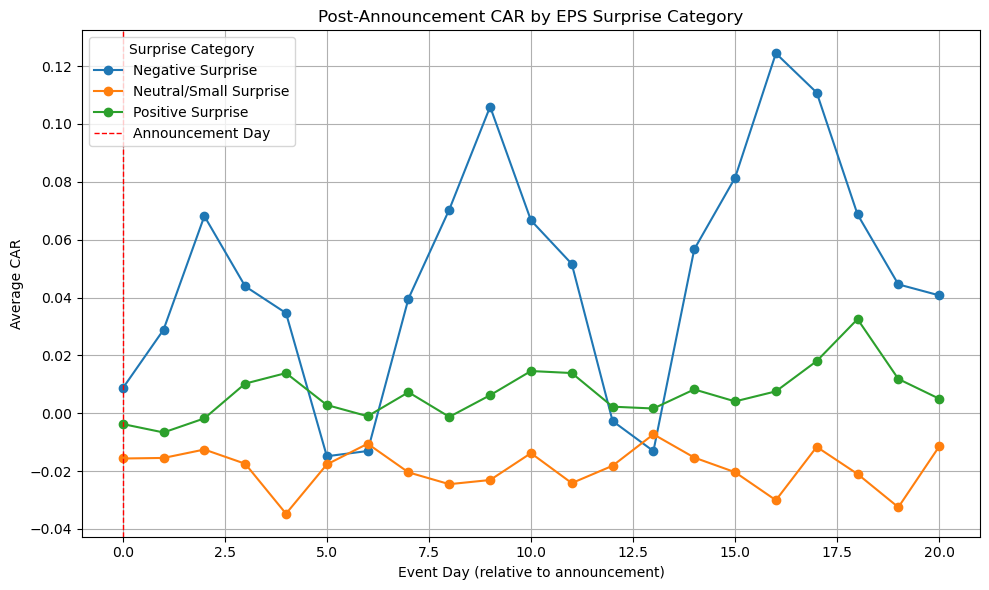

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for cat in avg_car_post["EPS_Category"].unique():
    subset = avg_car_post[avg_car_post["EPS_Category"] == cat]
    plt.plot(subset["event_day"], subset["CAR"], marker="o", label=cat)

plt.axvline(x=0, color="red", linestyle="--", linewidth=1, label="Announcement Day")
plt.title("Post-Announcement CAR by EPS Surprise Category")
plt.xlabel("Event Day (relative to announcement)")
plt.ylabel("Average CAR")
plt.legend(title="Surprise Category")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
avg_car_stock = post_announcement.groupby(["ticker_from_id", "event_day"])["CAR"].mean().reset_index()

print("Average CAR per stock (post-announcement):")
print(avg_car_stock.head())


Average CAR per stock (post-announcement):
  ticker_from_id  event_day       CAR
0           AAPL          0 -0.007943
1           AAPL          1 -0.003446
2           AAPL          2 -0.010355
3           AAPL          3 -0.012696
4           AAPL          4 -0.013764


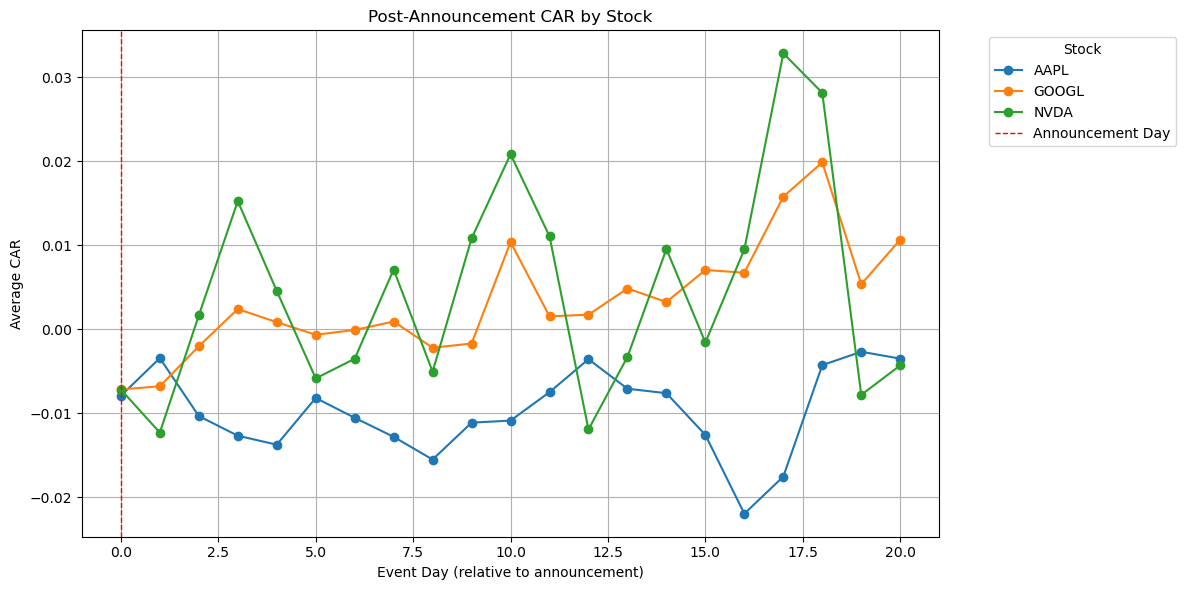

In [19]:
plt.figure(figsize=(12,6))

for stock in avg_car_stock["ticker_from_id"].unique():
    subset = avg_car_stock[avg_car_stock["ticker_from_id"] == stock]
    plt.plot(subset["event_day"], subset["CAR"], marker="o", label=stock)

plt.axvline(x=0, color="red", linestyle="--", linewidth=1, label="Announcement Day")
plt.title("Post-Announcement CAR by Stock")
plt.xlabel("Event Day (relative to announcement)")
plt.ylabel("Average CAR")
plt.legend(title="Stock", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Compute CAR per event (ticker + announcement date)
merged["CAR"] = merged.groupby(["ticker_from_id", "reportedDate"])["abnormal_return"].cumsum()

In [26]:
post_announcement = merged[merged["event_day"] >= 0]

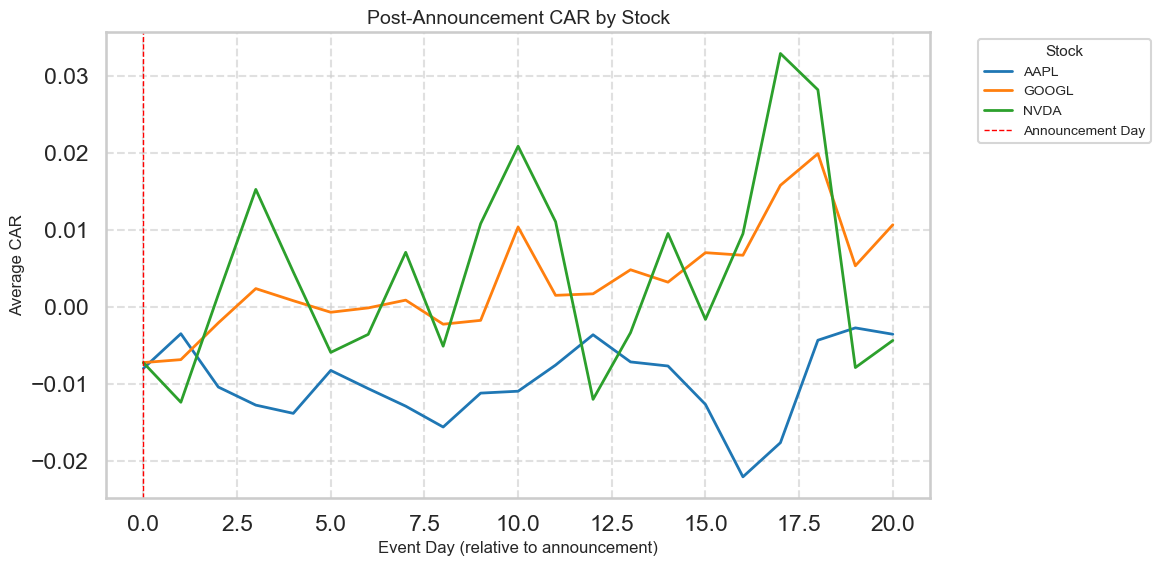

In [28]:
plt.figure(figsize=(12,6))

for stock in avg_car_stock["ticker_from_id"].unique():
    subset = avg_car_stock[avg_car_stock["ticker_from_id"] == stock]
    plt.plot(subset["event_day"], subset["CAR"], linewidth=2, label=stock)

plt.axvline(x=0, color="red", linestyle="--", linewidth=1, label="Announcement Day")
plt.title("Post-Announcement CAR by Stock", fontsize=14)
plt.xlabel("Event Day (relative to announcement)", fontsize=12)
plt.ylabel("Average CAR", fontsize=12)
plt.legend(title="Stock", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, title_fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd

summary = (
    avg_car_stock[avg_car_stock["event_day"].isin([1,3,20])]
    .groupby(["ticker_from_id","event_day"])["CAR"]
    .mean()
    .unstack("event_day")
    .reset_index()
)

summary.columns = ["Stock","Day 1 CAR","Day 3 CAR","Day 20 CAR"]
print(summary)

   Stock  Day 1 CAR  Day 3 CAR  Day 20 CAR
0   AAPL  -0.003446  -0.012696   -0.003513
1  GOOGL  -0.006803   0.002402    0.010669
2   NVDA  -0.012327   0.015257   -0.004316


C:\Users\loveu\AppData\Local\Temp\ipykernel_18796\4151738409.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


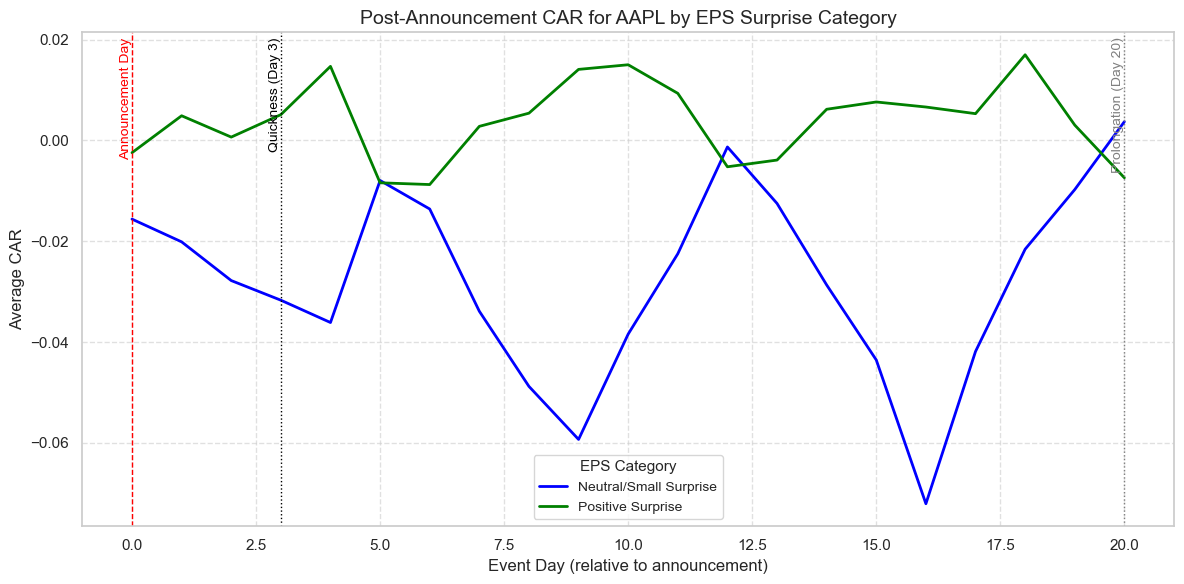

C:\Users\loveu\AppData\Local\Temp\ipykernel_18796\4151738409.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


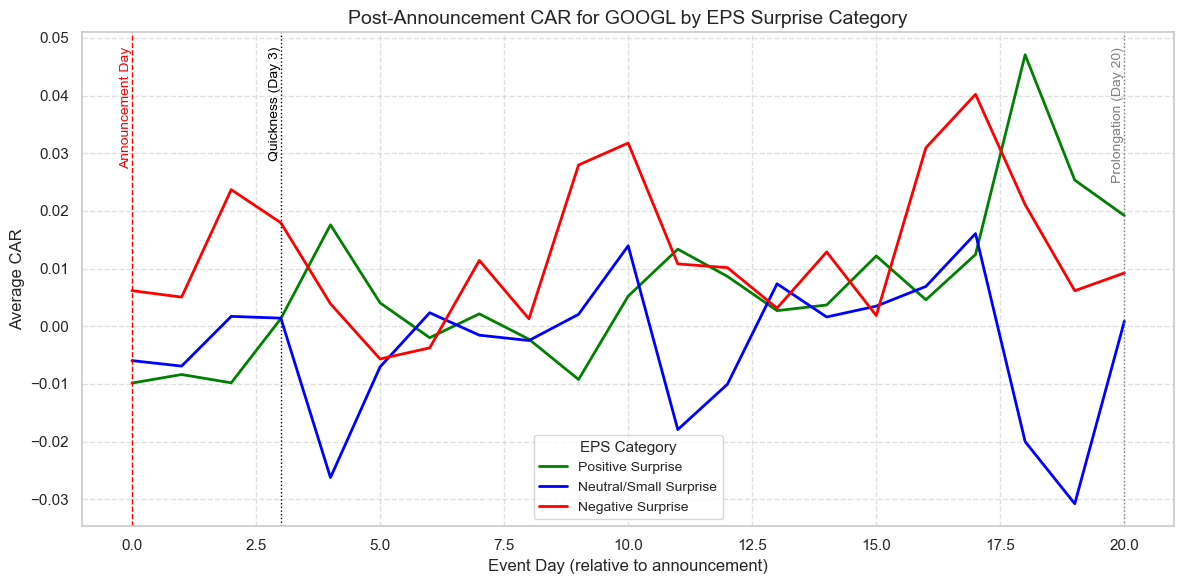

C:\Users\loveu\AppData\Local\Temp\ipykernel_18796\4151738409.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


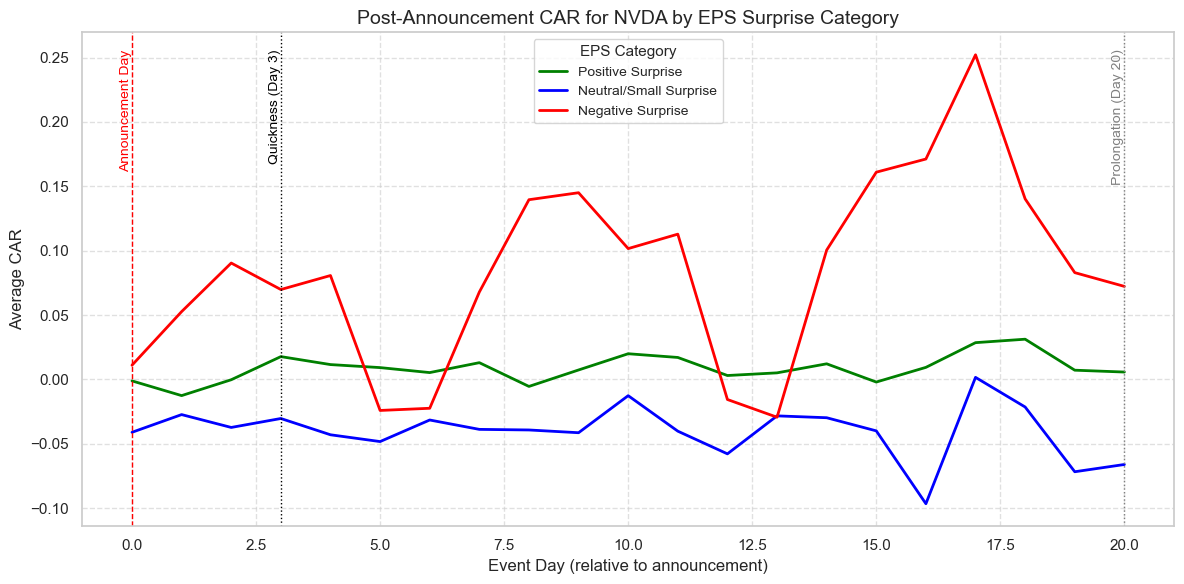

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook")

# Palette for EPS categories
palette = {
    "Negative Surprise": "red",
    "Neutral/Small Surprise": "blue",
    "Positive Surprise": "green"
}

for stock in post_announcement["ticker_from_id"].unique():
    subset = post_announcement[post_announcement["ticker_from_id"] == stock]

    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=subset,
        x="event_day",
        y="CAR",
        hue="EPS_Category",
        palette=palette,
        linewidth=2,
        ci=None   # trend only, no shaded range
    )

    # Announcement day marker
    plt.axvline(x=0, color="red", linestyle="--", linewidth=1)
    plt.text(0, plt.ylim()[1]*0.95, "Announcement Day", rotation=90,
             color="red", ha="right", va="top", fontsize=10)

    # Quickness window marker (Day 3)
    plt.axvline(x=3, color="black", linestyle=":", linewidth=1)
    plt.text(3, plt.ylim()[1]*0.95, "Quickness (Day 3)", rotation=90,
             color="black", ha="right", va="top", fontsize=10)

    # Prolongation window marker (Day 20)
    plt.axvline(x=20, color="gray", linestyle=":", linewidth=1)
    plt.text(20, plt.ylim()[1]*0.95, "Prolongation (Day 20)", rotation=90,
             color="gray", ha="right", va="top", fontsize=10)

    # Titles and labels
    plt.title(f"Post-Announcement CAR for {stock} by EPS Surprise Category", fontsize=14)
    plt.xlabel("Event Day (relative to announcement)", fontsize=12)
    plt.ylabel("Average CAR", fontsize=12)
    plt.legend(title="EPS Category", fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()